In [1]:
import pycaret

In [2]:
from pycaret.regression import *

In [3]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [16]:
# 한글깨짐 해결
plt.rcParams['font.family'] ="Malgun Gothic"

In [5]:
import numpy as np 
import pandas as pd
pd.options.display.max_rows = 100
pd.options.display.max_columns = 100

In [6]:
data = pd.read_csv("../autoML/automldata.csv", index_col = 0 )

In [7]:
train = data[data['date'] < '2020-09-01']
test = data[data['date'] >= '2020-09-01']

In [8]:
train = train[train['품목'] == '팽이버섯']
test = test[test['품목'] == '팽이버섯']
cat_f = ['주산지','요일']


setting = setup( data = train ,    target = '1_week' , categorical_features = cat_f,
               ignore_features = ['2_week','4_week','month','품목'] , normalize = True , session_id = 123)

,Description,Value
0,session_id,123
1,Target,1_week
2,Original Data,"(1443, 104)"
3,Missing Values,False
4,Numeric Features,96
5,Categorical Features,2
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(1010, 118)"


In [9]:
best = compare_models(sort = 'MAE' , exclude = ['omp','ard','par','ransac','huber'])

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
et,Extra Trees Regressor,200.6256,134187.7599,355.5002,0.6577,0.9895,0.1002,1.5200
lightgbm,Light Gradient Boosting Machine,209.4257,120700.4203,340.2330,0.6877,0.9799,0.1078,0.5490
rf,Random Forest Regressor,212.8117,132872.6368,355.3070,0.6586,0.9903,0.1098,2.7890
gbr,Gradient Boosting Regressor,221.5921,137908.3242,362.1848,0.6461,0.9735,0.1175,1.2000
lasso,Lasso Regression,247.1286,146424.2945,376.8120,0.6205,0.9804,0.1351,0.0330
llar,Lasso Least Angle Regression,251.0302,159773.0979,390.4434,0.5910,0.9706,0.1352,0.0150
ridge,Ridge Regression,252.8866,150930.6859,382.9621,0.6077,0.9851,0.1390,0.0130
lr,Linear Regression,256.5562,154100.6000,388.0931,0.5965,0.9890,0.1414,0.5080
br,Bayesian Ridge,258.0285,162324.2816,395.9218,0.5795,1.0085,0.1392,0.0240
en,Elastic Net,283.3411,185165.3617,423.0715,0.5203,1.0262,0.1539,0.0230


### Extra Trees Regressor

In [10]:
model = create_model('et')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,139.3375,35755.2685,189.0906,0.8655,0.1129,0.0886
1,254.6927,262378.1815,512.2286,0.5182,1.4888,0.0980
2,209.9000,132066.9311,363.4101,0.5840,1.2613,0.1175
3,195.3992,82413.2431,287.0771,0.7539,0.7231,0.1013
4,191.7634,109650.1284,331.1346,0.6821,0.6837,0.1064
5,208.4027,185935.2083,431.2021,0.5530,1.3190,0.0913
6,246.1856,209857.8798,458.1025,0.4635,1.5142,0.1110
7,206.3611,124433.8443,352.7518,0.6995,1.2490,0.1034
8,174.0876,113308.1663,336.6128,0.6673,0.7935,0.0879
9,180.1262,86078.7480,293.3918,0.7899,0.7500,0.0964


In [11]:
tuned_model = tune_model(model)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,174.1327,50098.9857,223.8280,0.8115,0.1295,0.1086
1,273.7134,269495.4361,519.1295,0.5051,1.5155,0.1085
2,233.3712,160294.0621,400.3674,0.4950,1.3021,0.1284
3,237.4943,114770.6747,338.7782,0.6573,0.7423,0.1211
4,202.3094,92617.0604,304.3305,0.7315,0.7454,0.1135
5,238.5230,204451.7960,452.1635,0.5084,1.3269,0.1067
6,250.2806,219294.9713,468.2894,0.4394,1.5203,0.1098
7,238.4792,156800.1773,395.9800,0.6214,1.2898,0.1201
8,202.5844,117176.1905,342.3101,0.6559,0.7904,0.1090
9,226.0871,117813.0068,343.2390,0.7125,0.7659,0.1212


In [12]:
print(tuned_model)

ExtraTreesRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse', max_depth=9,
                    max_features=1.0, max_leaf_nodes=None, max_samples=None,
                    min_impurity_decrease=0.1, min_impurity_split=None,
                    min_samples_leaf=4, min_samples_split=7,
                    min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
                    oob_score=False, random_state=123, verbose=0,
                    warm_start=False)


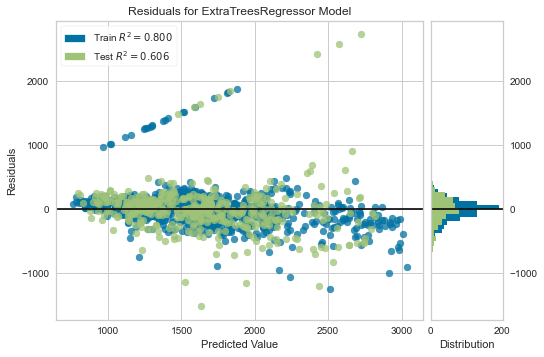

In [13]:
plot_model(tuned_model, plot = 'residuals')

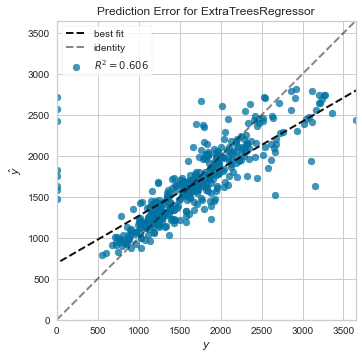

In [14]:
plot_model(tuned_model, plot = 'error')

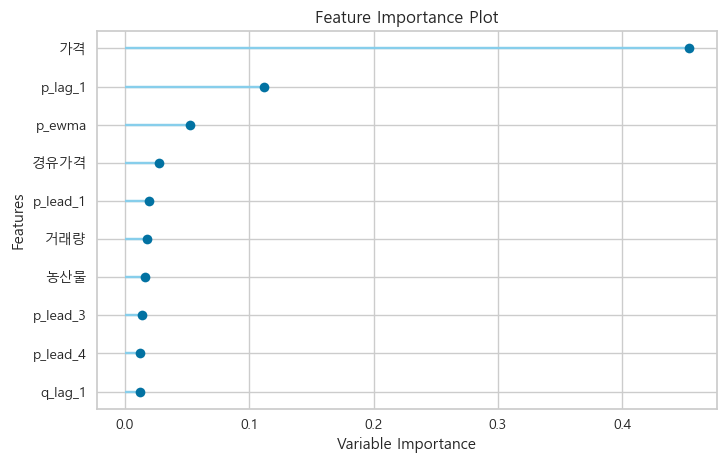

In [17]:
plot_model(tuned_model, plot = 'feature')

In [18]:
predict_model(tuned_model)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Extra Trees Regressor,221.1485,148875.8188,385.8443,0.6059,1.0405,0.1126


,가격,거래량,경유가격,농산물,temp,max_Temp,min_Temp,wind,rain,dif_Temp,...,date_month_9,date_weekday_0,date_weekday_1,date_weekday_4,date_weekday_5,date_weekday_6,date_is_month_end_1,date_is_month_start_0,1_week,Label
0,0.255052,1.363279,-0.134429,-0.643916,-1.578751,-1.466402,-1.491543,-0.163808,-0.327215,0.291260,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1685.0,1777.945703
1,0.291904,-0.851001,0.952878,0.642009,-0.417006,-0.575431,-0.525931,0.700661,-0.327215,-0.030140,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2043.0,1835.980046
2,0.507752,0.097607,-0.370991,-0.643916,-1.582089,-1.721926,-1.428637,1.033149,-0.327215,-0.443368,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1918.0,1900.178304
3,0.602515,-0.238120,0.962110,0.098269,-0.931111,-0.555258,-0.937967,1.232641,-0.327215,1.018235,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2148.0,2054.002877
4,0.451597,0.819831,-1.913553,-0.718002,-0.774209,-0.491377,-1.098379,-0.296803,-0.327215,1.553902,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1881.0,1671.587623
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
428,0.588476,-0.364058,-0.647161,-1.072558,-1.315021,-1.479851,-1.101524,1.764622,-0.327215,-0.688244,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1839.0,2005.734008
429,-0.362658,0.273560,-1.226999,1.599838,1.629401,1.482207,1.625465,0.301675,-0.327215,-0.581111,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1258.0,1398.191357
430,-0.234554,1.646916,0.201104,0.335081,-1.431864,-1.526921,-1.277662,2.230105,-0.327215,-0.366844,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1366.0,1541.698133
431,-0.696082,1.238283,-1.657932,-0.867499,0.304077,0.144070,0.307578,-0.097310,-0.327215,-0.420411,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1109.0,1259.321540


In [19]:
final_ml = finalize_model(tuned_model)
print(final_ml)

ExtraTreesRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse', max_depth=9,
                    max_features=1.0, max_leaf_nodes=None, max_samples=None,
                    min_impurity_decrease=0.1, min_impurity_split=None,
                    min_samples_leaf=4, min_samples_split=7,
                    min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
                    oob_score=False, random_state=123, verbose=0,
                    warm_start=False)


In [20]:
unseen_pred = predict_model(final_ml, data = test)
unseen_pred.head()

,date,요일,품목,가격,거래량,주산지,경유가격,농산물,temp,max_Temp,...,w_lag_2m,w_lead_1,w_lead_2,w_lead_3,w_lead_4,p_lead_1,p_lead_2,p_lead_3,p_lead_4,Label
20768,2020-09-01,화요일,팽이버섯,1341.0,113389.0,경북,1146.32,139.93,24.600000,29.400000,...,0.400000,2.266667,0.466667,0.333333,0.566667,91594.0,0.0,123356.6,127717.0,1483.354461
20769,2020-09-02,수요일,팽이버섯,1333.0,118538.5,경북,1145.98,139.93,24.433333,26.133333,...,0.500000,1.300000,2.266667,0.466667,0.333333,119464.0,91594.0,0.0,123356.6,1512.088979
20770,2020-09-03,목요일,팽이버섯,1291.0,121714.0,경북,1145.93,139.93,24.666667,28.400000,...,0.633333,0.666667,1.300000,2.266667,0.466667,131217.4,119464.0,91594.0,0.0,1408.814316
20771,2020-09-04,금요일,팽이버섯,1275.0,127717.0,경북,1145.60,139.93,22.033333,29.900000,...,0.400000,0.400000,0.666667,1.300000,2.266667,145077.2,131217.4,119464.0,91594.0,1270.299552
20772,2020-09-05,토요일,팽이버섯,1254.0,123356.6,경북,1145.49,139.93,19.700000,23.233333,...,0.200000,0.433333,0.400000,0.666667,1.300000,136198.1,145077.2,131217.4,119464.0,1268.556053


In [21]:
pred = unseen_pred[['date','1_week','Label']]
pred_0 = pred[pred['1_week'] > 0 ]

In [22]:
score = np.absolute(np.subtract(pred_0['1_week'], pred_0['Label']))/ pred_0['1_week']
score.mean()

0.2152208039861697

<AxesSubplot:xlabel='date', ylabel='1_week'>

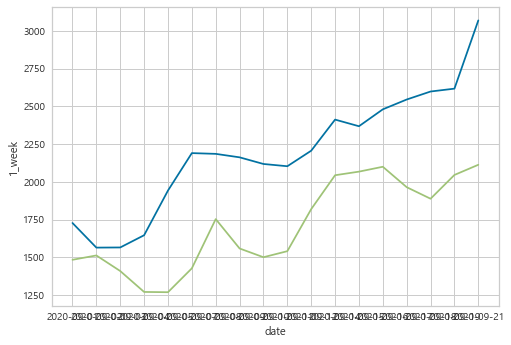

In [23]:
sns.lineplot(x= 'date', y= '1_week', data = pred_0)
sns.lineplot(x= 'date',y = 'Label', data = pred_0)